In [98]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

loading the data set using pandas

In [99]:
df = pd.read_excel('ENB2012_data.xlsx')

In [100]:
df.describe()
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [101]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [102]:
q1= df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lo_limit = q1 - 1.5*iqr
up_limit = q3 + 1.5*iqr
print(lo_limit)        
print(up_limit)

X1      0.46125
X2    404.25000
X3    220.50000
X4     21.43750
X5     -1.75000
X6      0.50000
X7     -0.35000
X8     -1.62500
Y1    -15.02000
Y2    -10.64875
dtype: float64
X1      1.05125
X2    943.25000
X3    416.50000
X4    339.93750
X5     12.25000
X6      6.50000
X7      0.85000
X8      7.37500
Y1     59.68000
Y2     59.40125
dtype: float64


In [103]:
df[(df>lo_limit)|(df<up_limit)]


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


now for the correlation part 

In [104]:
print("here is the correlation matrix")
df[df.columns].corr()

here is the correlation matrix


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


we can see none of the data is outliers and no nan value exists so we are done with with pre-processing part

now the heatmap

<Axes: >

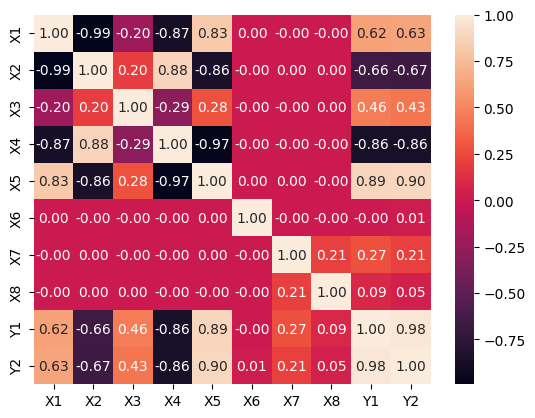

In [105]:
sns.heatmap(data=df[df.columns].corr(), annot = True, fmt = ".2f")

Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [106]:
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = df[['Y1','Y2']]
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state = 1
)

Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

equation now becomes 
Y1 = b0+b1X1+b2X2+b3X3+b4X4+b5X5+b6X6+b7X7+b8X8
BUT FORM THE HEAT MAP AMD CORRELATION map we can figure out that Y1 strongly depends only on X7 X4 X5 X2 X1
so the equation becomes Y1 = b0+b1X1+b2X2+b4X4+b5X5+b7X7

so we only split the required columns for the further model training and testing 

In [107]:
X = df[['X1','X2','X4','X5','X7']]
y = df[['Y1']]
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state = 1
)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_with_one = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_one = np.c_[np.ones(X_test.shape[0]), X_test]

implementing the multivarient liner regression 

In [108]:
def multiavr_lin_reg(X,y):
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [109]:
beta = multiavr_lin_reg(X_train_with_one,y_train)
beta

array([[ 8.11512972e+01],
       [-6.34432561e+01],
       [-2.52403939e-02],
       [-1.16891523e-01],
       [ 4.29499285e+00],
       [ 2.03214406e+01]])

In [110]:
Y1_pred = X_test_with_one @ beta
Y1_pred.shape

(154, 1)

<Figure size 640x480 with 0 Axes>

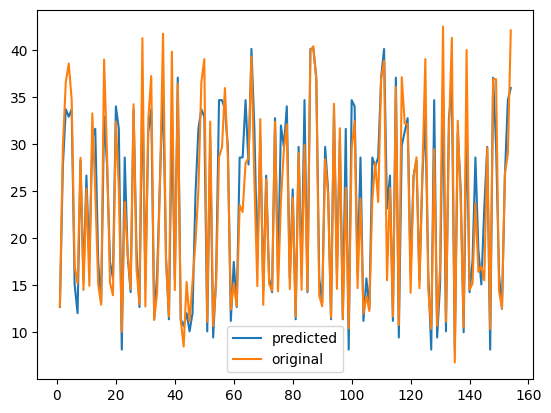

mean_squared_error 10.134063168331554
r2_score 0.8991531479442064


In [111]:
arr = np.linspace(1,154,154)
plt.figure()
fig, ax = plt.subplots()
ax.plot(arr,Y1_pred,label='predicted')
ax.plot(arr,y_test,label='original')
legend = ax.legend()

plt.show()
mse = mean_squared_error(y_test,Y1_pred)
R2 = r2_score(y_test,Y1_pred)
print("mean_squared_error",mse)
print("r2_score",R2)

with scikit-learn lib

In [112]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
R_sq_linear = r2_score(y_test, y_pred)
print('Mean-squared Error =', mse_linear)
print('R-squared Value =', R_sq_linear)

Mean-squared Error = 10.134063168393395
R-squared Value = 0.899153147943591


Ridge reg

In [113]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
R_sq_ridge = r2_score(y_test, y_pred_ridge)
print('Mean-squared Error =', mse_ridge)
print('R-squared Value =', R_sq_ridge)

Mean-squared Error = 10.4432947210041
R-squared Value = 0.8960758996455376


lasso reg

In [114]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
R_sq_lasso = r2_score(y_test, y_pred_lasso)
print('Mean-squared Error =', mse_lasso)
print('R-squared Value =', R_sq_lasso)

Mean-squared Error = 13.507988384493046
R-squared Value = 0.865578289423015


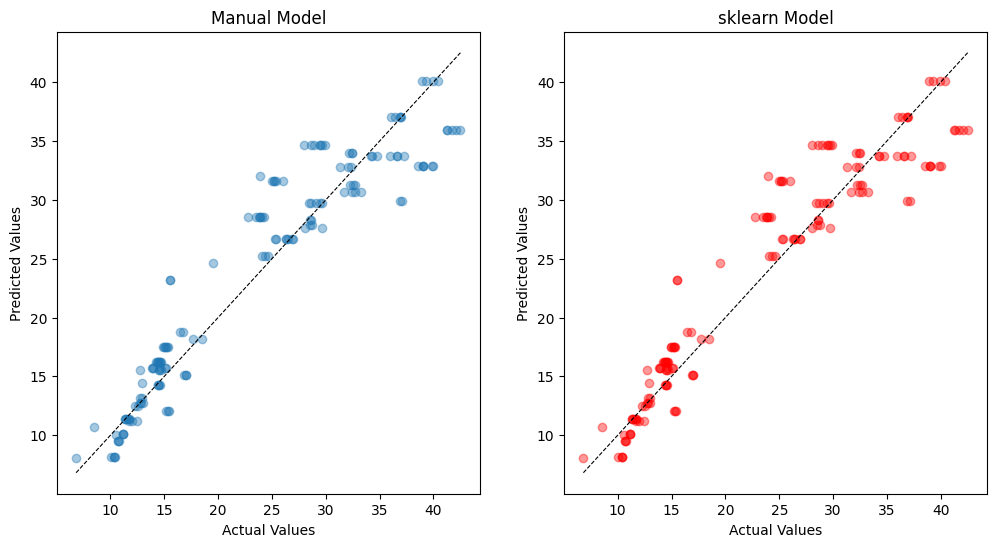

In [115]:
plt.figure(figsize=(12, 6))

# Manual Model
plt.subplot(1,2,1)
plt.scatter(y_test, Y1_pred, alpha = 0.4, marker='o' )
plt.title('Manual Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)


# sklearn Model
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha = 0.4, marker = 'o', c='red')
plt.title('sklearn Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)


Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.


so as to dec the heat load and  inc the efficiency we can decrease the value of feature that have an correlation vlaue of above 0.6 like X1
and we should inc the feature like X4 as they decrease the heat load value inc the efficiency 